<h3>Environment Setup</h3>

In [1]:
# Package installs
#pip install scikit-image
#pip install kagglehub

In [2]:
# Convert to binary image
from skimage.io import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as pltd

# Retrieve data
import kagglehub

# CCA
from skimage import measure
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
# Download data
# path = kagglehub.dataset_download("fareselmenshawii/large-license-plate-dataset")
# print("Path to dataset files:", path)

In [4]:
# Import example image in both color and grayscale
example_image_gray = imread("data/images/test/f5c2a80a21ddb78c.jpg", as_gray=True)
example_image_color = imread("data/images/test/f5c2a80a21ddb78c.jpg")

<h3>Convert to binary image</h3>
<h6><a href="https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_thresholding.html">More on thresholding</a></h6>

Threshold value: 0.509765625


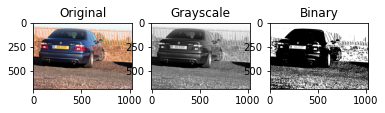

In [5]:
# Create figure with subplots for images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Show original image (color version)
ax1.imshow(example_image_color)
ax1.set_title("Original")

# Show grayscale version of image
ax2.imshow(example_image_gray, cmap="gray")
ax2.set_title("Grayscale")

# Define threshold for maximizing variance
threshold_value = threshold_otsu(example_image_gray)
print("Threshold value:" ,threshold_value)

# Show binary (thresholded) version of image
binary_image = example_image_gray > threshold_value
ax3.imshow(binary_image, cmap="gray")
ax3.set_title("Binary")

plt.show()

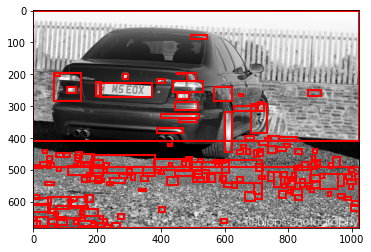

In [6]:
labeled_image = measure.label(binary_image)

fix, (ax1) = plt.subplots(1)
ax1.imshow(example_image_gray, cmap="gray")


for region in regionprops(labeled_image):
    if region.area < 50:
        continue
        
    minRow, minCol, maxRow, maxCol = region.bbox
    rectBorder = patches.Rectangle((minCol, minRow), maxCol-minCol, maxRow-minRow, edgecolor="red", linewidth=2, fill=False)
    ax1.add_patch(rectBorder)

plt.show()